In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import json
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

from tqdm.auto import tqdm
from pathlib import Path


import seaborn as sns
#from tslearn.clustering import TimeSeriesKMeans
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
#from MulticoreTSNE import MulticoreTSNE as TSNE

In [ ]:
!pip install MulticoreTSNE

In [ ]:
!pip install tslearn

In [ ]:
from tslearn.clustering import TimeSeriesKMeans
from MulticoreTSNE import MulticoreTSNE as TSNE

/usr/local/lib/python3.7/dist-packages/tslearn/clustering/kmeans.py:17: UserWarning: Scikit-learn <0.24 will be deprecated in a future release of tslearn
  "Scikit-learn <0.24 will be deprecated in a "


In [ ]:
pip install cryptocompare

In [ ]:
import cryptocompare
import json
import socket
import socks
import time
from tqdm.auto import tqdm
from joblib import delayed, Parallel
from itertools import cycle

In [ ]:
cryptocompare.get_coin_list(format=True)

['BTCD',
 'CRAIG',
 'XBS',
 'XPY',
 'PRC',
 'YBC',
 'DANK',
 'GIVE',
 'KOBO',
 'DT',
 'CETI',
 'SUP',
 'XPD',
 'GEO',
 'CHASH',
 'NXTI',
 'WOLF',
 'XDP',
 '2015',
 '42',
 'AC',
 'ACOIN',
 'AERO',
 'ALF',
 'AEGIS',
 'AMC',
 'ALIEN',
 'APEX',
 'ARCH',
 'ARG',
 'ARI',
 'AXR',
 'BEAN',
 'BLU',
 'BOST',
 'BQC',
 'XMY',
 'ZET',
 'SXC',
 'QTL',
 'ENRG',
 'RIC',
 'LIMX',
 'BTB',
 'CAIX',
 'BTMK',
 'BUK',
 'CACH',
 'CANN',
 'CAP',
 'CASH',
 'CBX',
 'CCN',
 'CIN',
 'CINNI',
 'CXC',
 'CLAM',
 'CLR',
 'CMC',
 'CNC',
 'CNL',
 'COMM',
 'COOL',
 'CRACK',
 'CRYPT',
 'DEM',
 'DIAM',
 'DRKC',
 'DSB',
 'EAC',
 'EFL',
 'ELC',
 'EMD',
 'EXCL',
 'EZC',
 'FLAP',
 'FC2',
 'FFC',
 'FIBRE',
 'FRC',
 'FLT',
 'FRK',
 'FRAC',
 'FSTC',
 'GDC',
 'GLX',
 'GLYPH',
 'GML',
 'GUE',
 'HAL',
 'HBN',
 'HUC',
 'HVC',
 'HYP',
 'ICB',
 'IFC',
 'IXC',
 'JBS',
 'JKC',
 'JUDGE',
 'KDC',
 'KEYC',
 'KGC',
 'LK7',
 'LKY',
 'LSD',
 'LTCD',
 'LTCX',
 'LXC',
 'LYC',
 'MAX',
 'MINRL',
 'MINT',
 'MN',
 'MINC',
 'MRY',
 'MZC',
 'NAN',
 '

In [ ]:
'BTC' in cryptocompare.get_coin_list(format=True)

True

In [ ]:
tickers = cryptocompare.get_coin_list(format=True)

In [ ]:
len(tickers)

6946

In [ ]:
"""
CryptoCompare API wrapper
"""
import requests
import time
import datetime
import typing
import os
from typing import Union, Optional, List, Dict
Timestamp = Union[datetime.datetime, datetime.date, int, float]

# API
_API_KEY_PARAMETER = ""
_URL_COIN_LIST = 'https://www.cryptocompare.com/api/data/coinlist?'
_URL_PRICE = 'https://min-api.cryptocompare.com/data/pricemulti?fsyms={}&tsyms={}'
_URL_PRICE_MULTI = 'https://min-api.cryptocompare.com/data/pricemulti?fsyms={}&tsyms={}'
_URL_PRICE_MULTI_FULL = 'https://min-api.cryptocompare.com/data/pricemultifull?fsyms={}&tsyms={}'
_URL_HIST_PRICE = 'https://min-api.cryptocompare.com/data/pricehistorical?fsym={}&tsyms={}&ts={}&e={}'
_URL_HIST_PRICE_DAY = 'https://min-api.cryptocompare.com/data/histoday?fsym={}&tsym={}&limit={}&e={}&toTs={}'
_URL_HIST_PRICE_HOUR = 'https://min-api.cryptocompare.com/data/histohour?fsym={}&tsym={}&limit={}&e={}&toTs={}'
_URL_HIST_PRICE_MINUTE = 'https://min-api.cryptocompare.com/data/histominute?fsym={}&tsym={}&limit={}&e={}&toTs={}'
_URL_AVG = 'https://min-api.cryptocompare.com/data/generateAvg?fsym={}&tsym={}&e={}'
_URL_EXCHANGES = 'https://www.cryptocompare.com/api/data/exchanges?'
_URL_PAIRS = 'https://min-api.cryptocompare.com/data/pair/mapping/exchange?e={}'

# DEFAULTS
CURRENCY = 'EUR'
LIMIT = 1440
###############################################################################


def _query_cryptocompare(url: str, errorCheck: bool = True, api_key: str = None) -> Optional[Dict]:
    """
    Query the url and return the result or None on failure.
    :param url: the url
    :param errorCheck: run extra error checks (default: True)
    :returns: respones, or nothing if errorCheck=True
    :api_key: optional, if you want to add an API Key
    """
    api_key_parameter = _set_api_key_parameter(api_key)
    try:
        response = requests.get(url + api_key_parameter).json()
    except Exception as e:
        print('Error getting coin information. %s' % str(e))
        return None
    if errorCheck and (response.get('Response') == 'Error'):
        print('[ERROR] %s' % response.get('Message'))
        return None
    return response


def _format_parameter(parameter: object) -> str:
    """
    Format the parameter depending on its type and return
    the string representation accepted by the API.
    :param parameter: parameter to format
    """
    if isinstance(parameter, list):
        return ','.join(parameter)

    else:
        return str(parameter)


def _format_timestamp(timestamp: Timestamp) -> int:
    """
    Format the timestamp depending on its type and return
    the integer representation accepted by the API.
    :param timestamp: timestamp to format
    """
    if isinstance(timestamp, datetime.datetime) or isinstance(timestamp, datetime.date):
        return int(time.mktime(timestamp.timetuple()))
    return int(timestamp)


def _set_api_key_parameter(api_key: str = None) -> str:
    if api_key is None:
        api_key = os.getenv('CRYPTOCOMPARE_API_KEY')
    if api_key is not None:
        _API_KEY = "&api_key={}".format(api_key)
        return _API_KEY
    return ""

###############################################################################


def get_coin_list(format: bool = False) -> Union[Dict, List, None]:
    """
    Get the coin list (all available coins).
    :param format: format as python list (default: False)
    :returns: dict or list of available coins
    """
    response = _query_cryptocompare(_URL_COIN_LIST, False)
    if response:
        response = typing.cast(Dict, response['Data'])
        return list(response.keys()) if format else response
    return None

# TODO: add option to filter json response according to a list of fields


def get_price(coin: str, currency: str = CURRENCY, full: bool = False) -> Optional[Dict]:
    """
    Get the currencyent price of a coin in a given currency.
    :param coin: symbolic name of the coin (e.g. BTC)
    :param currency: short hand description of the currency (e.g. EUR)
    :param full: full response or just the price (default: False)
    :returns: dict of coin and currency price pairs
    """
    if full:
        return _query_cryptocompare(
            _URL_PRICE_MULTI_FULL.format(
                _format_parameter(coin), _format_parameter(currency))
        )
    if isinstance(coin, list):
        return _query_cryptocompare(
            _URL_PRICE_MULTI.format(_format_parameter(coin),
                                    _format_parameter(currency))
        )
    return _query_cryptocompare(
        _URL_PRICE.format(coin, _format_parameter(currency))
    )


def get_historical_price(coin: str, currency: str = CURRENCY, timestamp: Timestamp = time.time(),
                         exchange: str = 'CCCAGG') -> Optional[Dict]:
    """
    Get the price of a coin in a given currency during a specific time.
    :param coin: symbolic name of the coin (e.g. BTC)
    :param currency: short hand description of the currency (e.g. EUR)
    :param timestamp: point in time
    :param exchange: the exchange to use
    :returns: dict of coin and currency price pairs
    """
    return _query_cryptocompare(
        _URL_HIST_PRICE.format(coin,
                               _format_parameter(currency),
                               _format_timestamp(timestamp),
                               _format_parameter(exchange))
    )


def get_historical_price_day(coin: str, currency: str = CURRENCY, limit: int = LIMIT,
                             exchange: str = 'CCCAGG', toTs: Timestamp = time.time()) -> Optional[Dict]:
    """
    Get historical price (day).
    :param coin: symbolic name of the coin (e.g. BTC)
    :param currency: short hand description of the currency (e.g. EUR)
    :param limit: number of data points (max. 2000)
    :param exchange: exchange to use (default: 'CCCAGG')
    :param toTs: return data before this timestamp. (Unix epoch time or datetime object)
    :returns: dict of coin and currency price pairs
    """
    response = _query_cryptocompare(
        _URL_HIST_PRICE_DAY.format(coin, _format_parameter(currency), limit, exchange, _format_timestamp(toTs)))
    if response:
        return response['Data']
    return None


def get_historical_price_hour(coin: str, currency: str = CURRENCY, limit: int = LIMIT,
                              exchange: str = 'CCCAGG', toTs: Timestamp = time.time()) -> Optional[Dict]:
    """
    Get historical price (hourly).
    :param coin: symbolic name of the coin (e.g. BTC)
    :param currency: short hand description of the currency (e.g. EUR)
    :param limit: number of data points (max. 2000)
    :param exchange: exchange to use (default: 'CCCAGG')
    :param toTs: return data before this timestamp. (Unix epoch time or datetime object)
    :returns: dict of coin and currency price pairs
    """
    response = _query_cryptocompare(
        _URL_HIST_PRICE_HOUR.format(coin, _format_parameter(currency), limit, exchange, _format_timestamp(toTs)))
    if response:
        return response['Data']
    return None


def get_historical_price_minute(coin: str, currency: str = CURRENCY, limit: int = LIMIT,
                                exchange: str = 'CCCAGG', toTs: Timestamp = time.time()) -> Optional[Dict]:
    """
    Get historical price (minute).
    :param coin: symbolic name of the coin (e.g. BTC)
    :param currency: short hand description of the currency (e.g. EUR)
    :param limit: number of data points (max. 2000)
    :param exchange: exchange to use (default: 'CCCAGG')
    :param toTs: return data before this timestamp. (Unix epoch time or datetime object)
    :returns: dict of coin and currency price pairs
    """
    response = _query_cryptocompare(
        _URL_HIST_PRICE_MINUTE.format(coin, _format_parameter(currency), limit, exchange, _format_timestamp(toTs)))
    if response:
        return response['Data']
    return None


def get_avg(coin: str, currency: str = CURRENCY, exchange: str = 'CCCAGG') -> Optional[Dict]:
    """
    Get the average price
    :param coin: symbolic name of the coin (e.g. BTC)
    :param currency: short hand description of the currency (e.g. EUR)
    :param exchange: exchange to use (default: 'CCCAGG')
    :returns: dict of coin and currency price pairs
    """
    response = _query_cryptocompare(_URL_AVG.format(
        coin, currency, _format_parameter(exchange)))
    if response:
        return response['RAW']
    return None


def get_exchanges() -> Optional[Dict]:
    """
    Get the list of available exchanges.
    :returns: list of available exchanges
    """
    response = _query_cryptocompare(_URL_EXCHANGES)
    if response:
        return response['Data']
    return None


def get_pairs(exchange: str = None) -> Optional[Dict]:
    """
    Get the list of available pairs for a particular exchange or for 
    all exchanges (if exchange is None)
    :param exchange: exchange to use (default: None)
    :returns: list of available exchanges
    """
    if exchange is None:
        response = _query_cryptocompare(_URL_PAIRS.split('?')[0])

    else:
        response = _query_cryptocompare(_URL_PAIRS.format(exchange))
    if response:
        return response['Data']
    return None

Теперь скачайте цены закрытия для имеющихся криптовалют по трем разным временным промежуткам:  
За последние 30 дней с дневной частотой - cryptocompare.get_historical_price_day(ticker, curr='USD', limit=30)  
За последние 3 дня с часовой частотой - cryptocompare.get_historical_price_hour(ticker, curr='USD', limit=3*24)  
За последний час с минутной частотой - cryptocompare.get_historical_price_minute(ticker, curr='USD', limit=60)  

In [ ]:
cryptocompare.get_historical_price_day(coin ='BTC', currency='USD', limit=30)

In [ ]:
for j, ticker in enumerate(tickers):
  if ticker == 'BTC':
      print(j, tickers[j])

6893 BTC


In [ ]:
BTC_30 = cryptocompare.get_historical_price_day(coin = tickers[6893], currency='USD', limit=30)

In [ ]:
BTC_30

In [ ]:
len(BTC_30)

31

In [ ]:
BTC_30[0]

{'close': 29795.55,
 'conversionSymbol': '',
 'conversionType': 'direct',
 'high': 31063.88,
 'low': 29320.09,
 'open': 30847.55,
 'time': 1626739200,
 'volumefrom': 43333.42,
 'volumeto': 1291958152.32}

In [ ]:
df_BTC_30 = []
for j in range(len(BTC_30)):
    df_BTC_30.append(BTC_30[j]['close'])

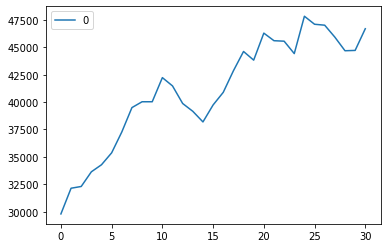

In [ ]:
dB30 = pd.DataFrame(df_BTC_30)
dB30.plot()

Потренировался скачивать данные с сервера на примере интересующей нас криптовалюты - 'BTC'. Теперь следует из всех tickers наугад выбрать несколько сот штук, может и не один раз. :) Достаточно одного будет раза, если в конечном счёте мы увидем явную кластеризацию на схожих и отличных криптовалют по сравнению с 'BTC'.

Планирование:
1. Выбрать несколько штук tickers, причем целевой ('BTC') пусть будет первым.
2. Организовать несколько временных рядов. Возможно стоит в json (или словарь).



In [ ]:
!mkdir '/content/drive/My Drive/Colab Notebooks/otus/cryptocompare/data'

In [ ]:
#dB30.to_json('/content/drive/My Drive/Colab Notebooks/otus/cryptocompare/data/pdb30.json')

In [ ]:
import cryptocompare
import json
import socket
import socks
import time
from tqdm.auto import tqdm
from joblib import delayed, Parallel
from itertools import cycle

In [ ]:
import cryptocompare
import json
import socket
import socks
import time
from tqdm.auto import tqdm
from joblib import delayed, Parallel
from itertools import cycle


def get_history(ticker, port):

    socks.set_default_proxy(socks.PROXY_TYPE_SOCKS5, '127.0.0.1', port)
    socket.socket = socks.socksocket

    day_30 = cryptocompare.get_historical_price_day(ticker, currency='USD', limit=30)
    day_3 = cryptocompare.get_historical_price_hour(ticker, currency='USD', limit=3*24)
    hour_1 = cryptocompare.get_historical_price_minute(ticker, currency='USD', limit=60)

    for o, file_name in [(day_30, f"/content/drive/My Drive/Colab Notebooks/otus/cryptocompare/data/{ticker}_30.json"), (day_3, f"/content/drive/My Drive/Colab Notebooks/otus/cryptocompare/data/{ticker}_3.json"), (hour_1, f"/content/drive/My Drive/Colab Notebooks/otus/cryptocompare/data/{ticker}_1.json")]:
        if o is not None:
            with open(file_name, 'w') as f:
                json.dump(o, f)
    time.sleep(1.5)


# Количесво потоков сбора
__COUNT__REQUEST__ = 2


if __name__ == '__main__':
    ports = cycle([9050, 9060, 9070, 9080])

    with open('/content/drive/My Drive/Colab Notebooks/otus/cryptocompare/tickers_500.json', 'r') as f:
        coin_list = json.load(f)

    # files = [f.name.split('_')[0] for f in Path('data').glob('*_3.json')]
    # coin_list = list(set(coin_list) - set(files))

    with Parallel(n_jobs=__COUNT__REQUEST__) as parallel, tqdm(total=len(coin_list)) as bar:
        while len(coin_list) > 0:
            q = []
            for i in range(50):
                try:
                    q.append([coin_list.pop(), next(ports)])
                except IndexError:
                    break

            parallel(delayed(get_history)(i[0], i[1]) for i in q)
            time.sleep(15)
            bar.update(len(q))

  0%|          | 0/476 [00:00<?, ?it/s]

In [ ]:
with open('/content/drive/My Drive/Colab Notebooks/otus/cryptocompare/tickers_500.json') as json_file:
    t500 = json.load(json_file)

In [ ]:
'BTC' in t500

True

In [ ]:
t500

In [ ]:
tickers

In [ ]:
for j, el in enumerate(t500):
    el_30 = cryptocompare.get_historical_price_day(coin = t500[j], currency='USD', limit=30)
    el_30 = json.dumps(el_30)
 
    with open(f"/content/drive/My Drive/Colab Notebooks/otus/cryptocompare/data/{el}_30.json", "w") as file:
        file.write(el_30)

In [ ]:
for j, el in enumerate(t500):
    el_3 = cryptocompare.get_historical_price_hour(coin = t500[j], currency='USD', limit=3*24)
    el_3 = json.dumps(el_3)

    with open(f"/content/drive/My Drive/Colab Notebooks/otus/cryptocompare/data/{el}_3.json", "w") as file:
        file.write(el_3)

In [ ]:
for j, el in enumerate(t500):
    el_1 = cryptocompare.get_historical_price_minute(coin = t500[j], currency='USD', limit=60)
    el_1 = json.dumps(el_1)

    with open(f"/content/drive/My Drive/Colab Notebooks/otus/cryptocompare/data/{el}_1.json", "w") as file:
        file.write(el_1)

## Готовим данные

In [ ]:
def read_ticker(filename):
    filename = Path(filename)
    ticker = filename.name.split('_')[0]
    df = pd.read_json(filename)
    
    return [ticker, df]

In [ ]:
data_30 = {}
data_3 = {}
data_1 = {}

for o, filename_template in [[data_30, '*_30.json'], [data_3, '*_3.json'], [data_1, '*_1.json']]:
    for filename in Path('/content/drive/My Drive/Colab Notebooks/otus/cryptocompare/data').glob(filename_template):
        name, data = read_ticker(filename)
        #if data.close.std() == 0:
        #    continue
        data = pd.DataFrame(data)
        o[name] = data

In [ ]:
# оставим только ту крипту что есть для всех промежутков
keys = list(set(data_30.keys()).intersection(data_3.keys()).intersection(data_1.keys()))
for data in [data_30, data_3, data_1]:
    key_for_del = list(set(data.keys()).difference(set(keys)))
    for key in key_for_del:
        del(data[key])

In [ ]:
data_1['BTC']

,time,high,low,open,volumefrom,volumeto,close,conversionType,conversionSymbol
0,1629043980,46179.14,46143.05,46147.94,5.682,262263.38,46143.05,direct,
1,1629044040,46145.79,46111.42,46143.05,14.530,670127.20,46114.90,direct,
2,1629044100,46116.68,46084.67,46114.90,14.100,650190.42,46093.62,direct,
3,1629044160,46093.62,46018.07,46093.62,12.200,561726.40,46037.31,direct,
4,1629044220,46077.45,46029.94,46037.31,7.190,331109.30,46042.83,direct,
...,...,...,...,...,...,...,...,...,...
56,1629047340,45790.46,45765.75,45777.62,8.646,395770.50,45768.98,direct,
57,1629047400,45768.98,45737.82,45768.98,12.660,578983.19,45749.36,direct,
58,1629047460,45764.36,45719.23,45753.55,287.810,13161191.96,45728.75,invert_divide,ETH
59,1629047520,45784.22,45731.80,45737.25,8.871,405914.82,45784.22,direct,


In [ ]:
data_30['TAC']['time']

0     1626739200
1     1626825600
2     1626912000
3     1626998400
4     1627084800
5     1627171200
6     1627257600
7     1627344000
8     1627430400
9     1627516800
10    1627603200
11    1627689600
12    1627776000
13    1627862400
14    1627948800
15    1628035200
16    1628121600
17    1628208000
18    1628294400
19    1628380800
20    1628467200
21    1628553600
22    1628640000
23    1628726400
24    1628812800
25    1628899200
26    1628985600
27    1629072000
28    1629158400
29    1629244800
30    1629331200
Name: time, dtype: int64

In [ ]:
# создадим индекс по времени в датафрейме
for ticker in data_1.keys():
    for data in [data_30, data_3, data_1]:
        pl = data[ticker]['time']   
        data[ticker]['time'] = pd.to_datetime(pl, unit='s')
        data[ticker].set_index('time', inplace=True)

In [ ]:
data_30

{}

**Поведение биткойна 'BTC' при закрытии за разные интервалы времени.**

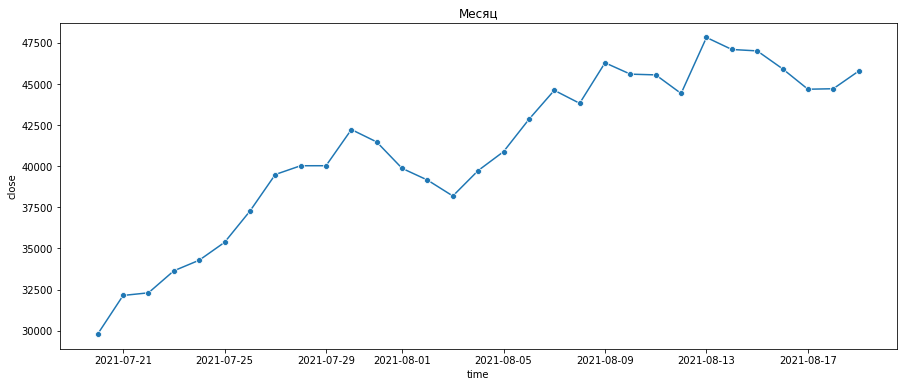

In [ ]:
fig, ax = plt.subplots(figsize=(15,6))
sns.lineplot(data=data_30['BTC'], y='close', x=data_30['BTC'].index, ax=ax, marker='o');
ax.set_title('Месяц');

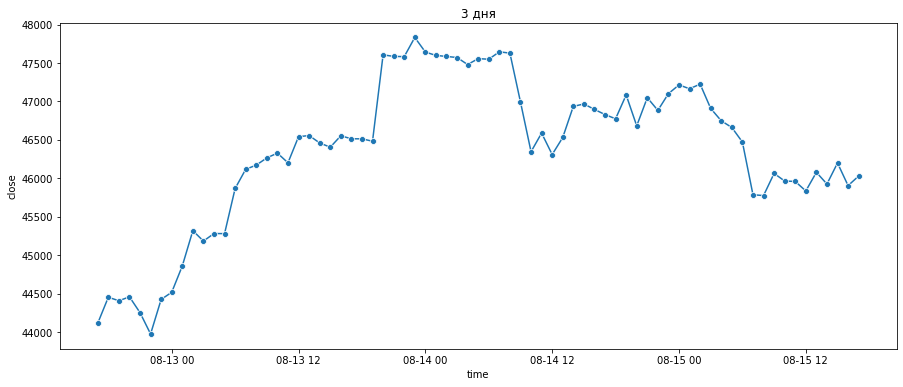

In [ ]:
fit, ax = plt.subplots(figsize=(15,6))
sns.lineplot(data=data_3['BTC'], y='close', x=data_3['BTC'].index, ax=ax, marker='o');
ax.set_title('3 дня');

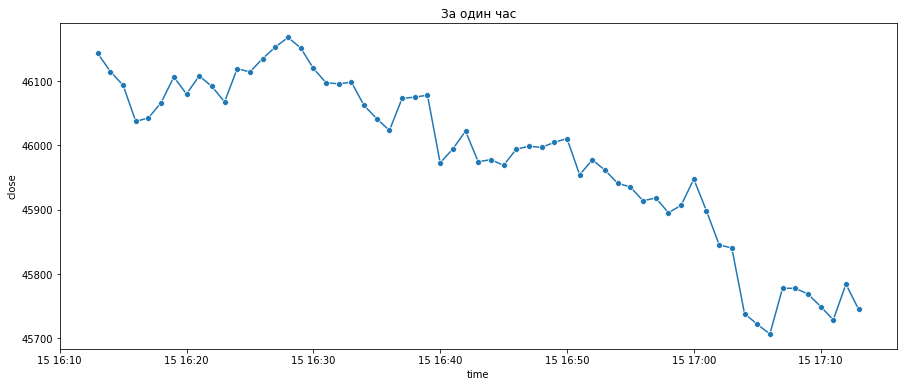

In [ ]:
fit, ax = plt.subplots(figsize=(15,6))
sns.lineplot(data=data_1['BTC'], y='close', x=data_1['BTC'].index, ax=ax, marker='o');
ax.set_title('За один час');

In [ ]:
tickers_name = list(data_30.keys())
feature = 'close'
index_of_btc = tickers_name.index('BTC')

In [ ]:
data[tickers_name[5]]['close']

In [ ]:
x_30 = np.empty((0, data_30['BTC'].shape[0]))
x_3 = np.empty((0, data_3['BTC'].shape[0]))
x_1 = np.empty((0, data_1['BTC'].shape[0]))
x_kostyl = {'x_30': x_30, 'x_3': x_3, 'x_1':x_1}

In [ ]:
data[tickers_name[48]]['close']

time
2021-07-20    0.2729
2021-07-21    0.2944
2021-07-22    0.2959
2021-07-23    0.3081
2021-07-24    0.3140
2021-07-25    0.3240
2021-07-26    0.3414
2021-07-27    0.3618
2021-07-28    0.3667
2021-07-29    0.3667
2021-07-30    0.3868
2021-07-31    0.3799
2021-08-01    0.3652
2021-08-02    0.3587
2021-08-03    0.3498
2021-08-04    0.3640
2021-08-05    0.3745
2021-08-06    0.3925
2021-08-07    0.4087
2021-08-08    0.4015
2021-08-09    0.4240
2021-08-10    0.4177
2021-08-11    0.4173
2021-08-12    0.4069
2021-08-13    0.4381
2021-08-14    0.4315
2021-08-15    0.4307
2021-08-16    0.4207
2021-08-17    0.4093
2021-08-18    0.4096
2021-08-19    0.8691
Name: close, dtype: float64

In [ ]:
for j in range(len(tickers_name)):  
    pl = data[tickers_name[5]]['close']
    print(pl)

Количество тикеров у которых указана величина при закрытии.

In [ ]:
tickers_name = list(data_30.keys())
len(tickers_name)

335

In [ ]:
'BTC' in tickers_name

True

In [ ]:
t335 = tickers_name

In [ ]:
for ticker in tqdm(tickers_name):
    for k, data in [['x_30', data_30], ['x_3', data_3], ['x_1', data_1]]:  
        pl = data[ticker][['close']]
        signal = pl.to_numpy().swapaxes(0,1)
        x_kostyl[k] = np.vstack([x_kostyl[k], signal])
    x_30 = x_kostyl['x_30']
    x_3 = x_kostyl['x_3']
    x_1 = x_kostyl['x_1']

In [ ]:
def get_scaler_data(data):
    scaler = StandardScaler()
    return scaler.fit_transform(data.T).T

In [ ]:
x_30 = get_scaler_data(x_30)
x_3 = get_scaler_data(x_3)
x_1 = get_scaler_data(x_1)

## Кластеризация

In [ ]:
def plot_distortions(k_range, data, model):
    distortions = []
    K = k_range
    for k in tqdm(K):
        model.set_params(n_clusters=k)
#         kmeanModel = KMeans(n_clusters=k)
        model.fit(data)
        distortions.append(model.inertia_)

    plt.figure(figsize=(12,6))
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title('Elbow Method')
    plt.show()

# BaseLine KMeans

**30 дневный промежуток**

  0%|          | 0/19 [00:00<?, ?it/s]

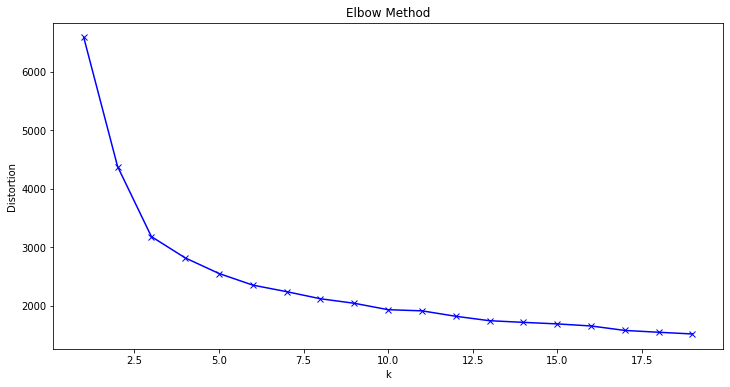

In [ ]:
plot_distortions(range(1,20), x_30, KMeans())

In [ ]:
model_30 = KMeans(n_clusters=6)
model_30.fit(x_30)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

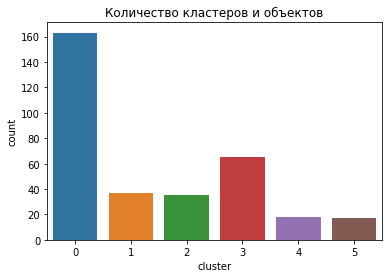

In [ ]:
cluster, count = np.unique(model_30.labels_, return_counts=True);
sns.barplot(x=cluster, y=count).set(xlabel='cluster', ylabel='count', title='Количество кластеров и объектов');

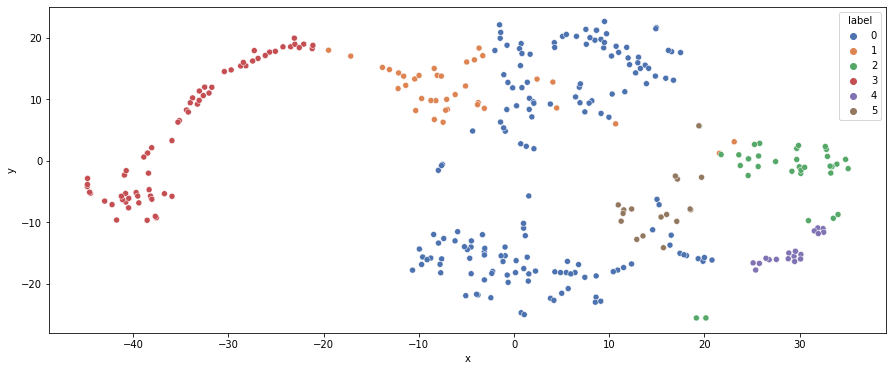

In [ ]:
tsne_30 = TSNE(perplexity=10, random_state=32).fit_transform(x_30)
tsne_df_30 = pd.DataFrame({'x':tsne_30[:,0], 'y':tsne_30[:,1], 'label':model_30.labels_})
fig, ax = plt.subplots(figsize=(15,6))
sns.scatterplot(data=tsne_df_30, x='x', y='y', palette="deep", hue='label');

Крипта похожая на биткойн.

In [ ]:
def plot_sample_coin(data, labels, mask, title='', figsize=(16, 4)):
    unique_labels = np.unique(labels[mask])
    shape = (len(unique_labels), 3)

    fig, ax = plt.subplots(shape[0], shape[1], figsize=(figsize))
    if len(ax.shape) < 2:
        ax = ax[None,:]
    fig.suptitle(title)
    fig.subplots_adjust(wspace=0, hspace=0.25)
    
    for i, cluster in enumerate(unique_labels):
        coin = np.random.choice(np.where(labels == cluster)[0], size=3, replace=False)
        for ax_i in range(3):
            fig.suptitle(title)
            ax[i, ax_i].plot(data[index_of_btc], 'r', label='BTC')
            ax[i, ax_i].plot(data[coin[ax_i]], 'b--', label=tickers_name[coin[ax_i]])
            ax[i, ax_i].legend(loc='upper left')
            
            ax[i, ax_i].set_title(f"Cluster {cluster}")

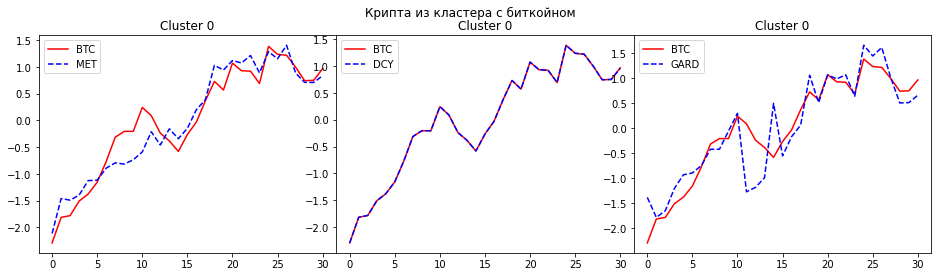

In [ ]:
mask = model_30.labels_ == model_30.labels_[index_of_btc]
plot_sample_coin(x_30, model_30.labels_, mask, 'Крипта из кластера с биткойном')

Примеры крипты попавших в другие кластера

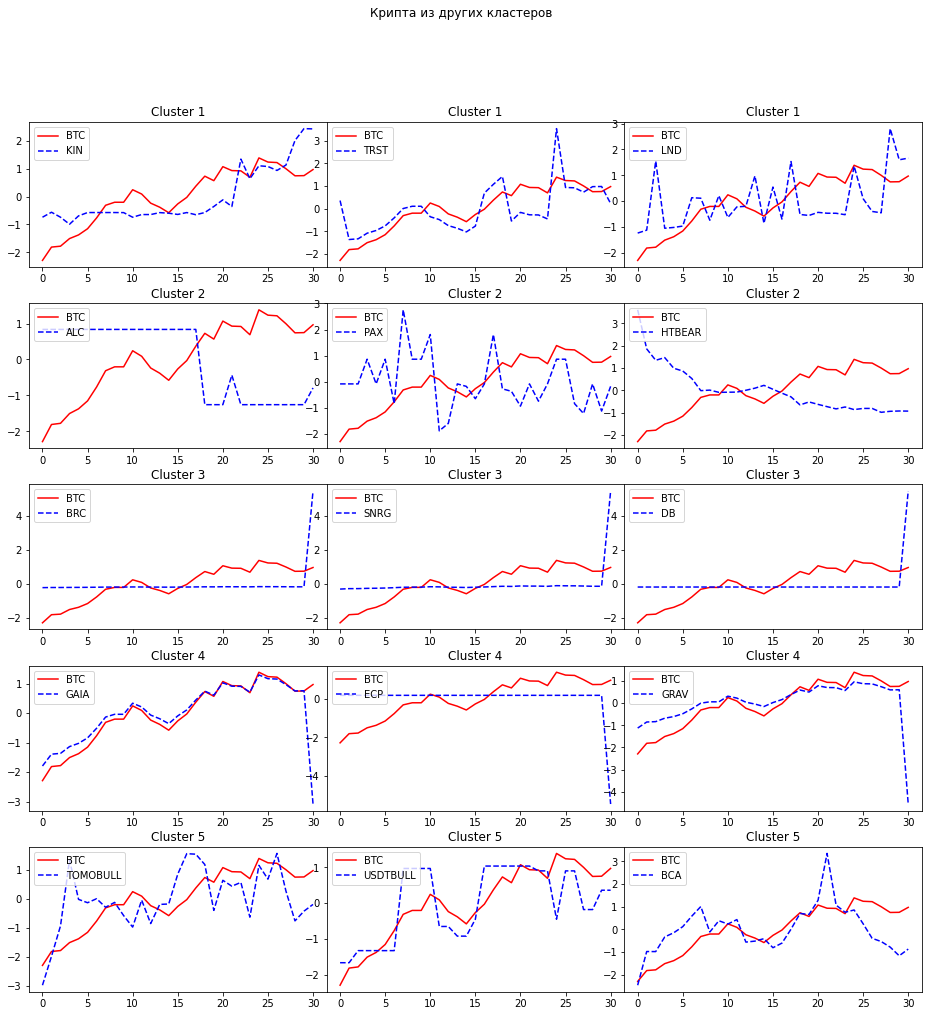

In [ ]:
mask = ~mask
plot_sample_coin(x_30, model_30.labels_, mask, 'Крипта из других кластеров', figsize=(16, 16))

За 3 дня с часовой частотой

  0%|          | 0/19 [00:00<?, ?it/s]

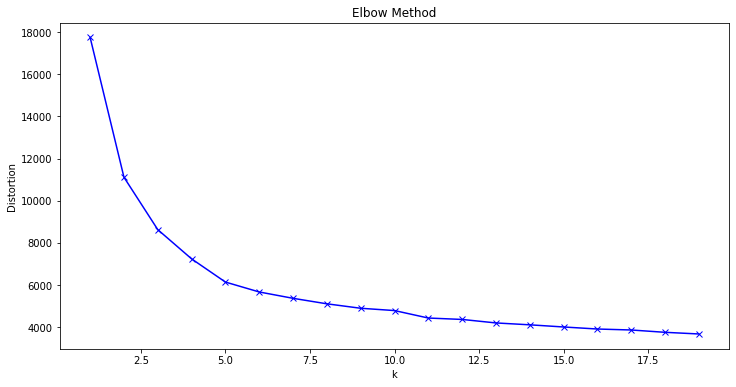

In [ ]:
plot_distortions(range(1,20), x_3, KMeans())

In [ ]:
model_3 = KMeans(n_clusters=6)
model_3.fit(x_3)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

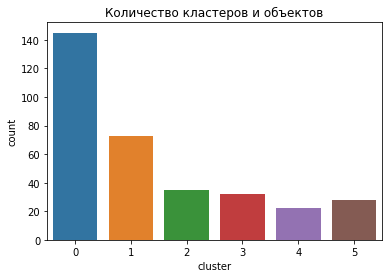

In [ ]:
cluster, count = np.unique(model_3.labels_, return_counts=True);
sns.barplot(x=cluster, y=count).set(xlabel='cluster', ylabel='count', title='Количество кластеров и объектов');

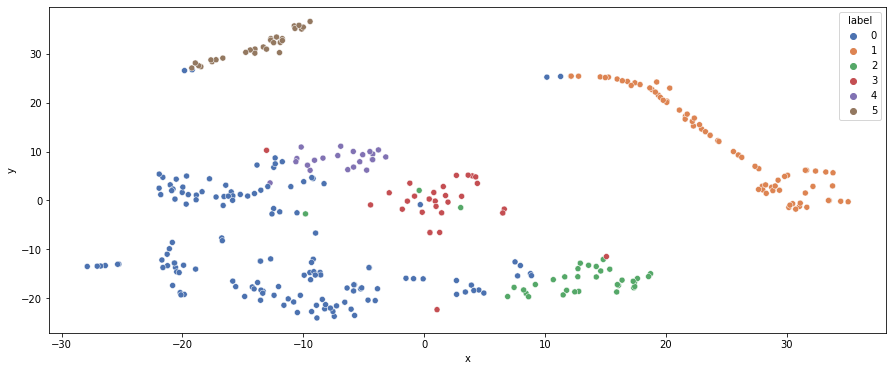

In [ ]:
tsne_3 = TSNE(perplexity=10, random_state=32).fit_transform(x_3)
tsne_df_3 = pd.DataFrame({'x':tsne_3[:,0], 'y':tsne_3[:,1], 'label':model_3.labels_})
fig, ax = plt.subplots(figsize=(15,6))
sns.scatterplot(data=tsne_df_3, x='x', y='y', palette="deep", hue='label');

Крипта похожая на биткойн

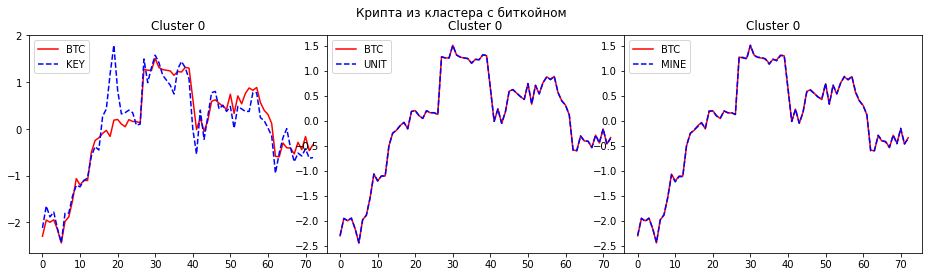

In [ ]:
mask = model_3.labels_ == model_3.labels_[index_of_btc]
plot_sample_coin(x_3, model_3.labels_, mask, 'Крипта из кластера с биткойном')

Примеры крипты попавших в другие кластера

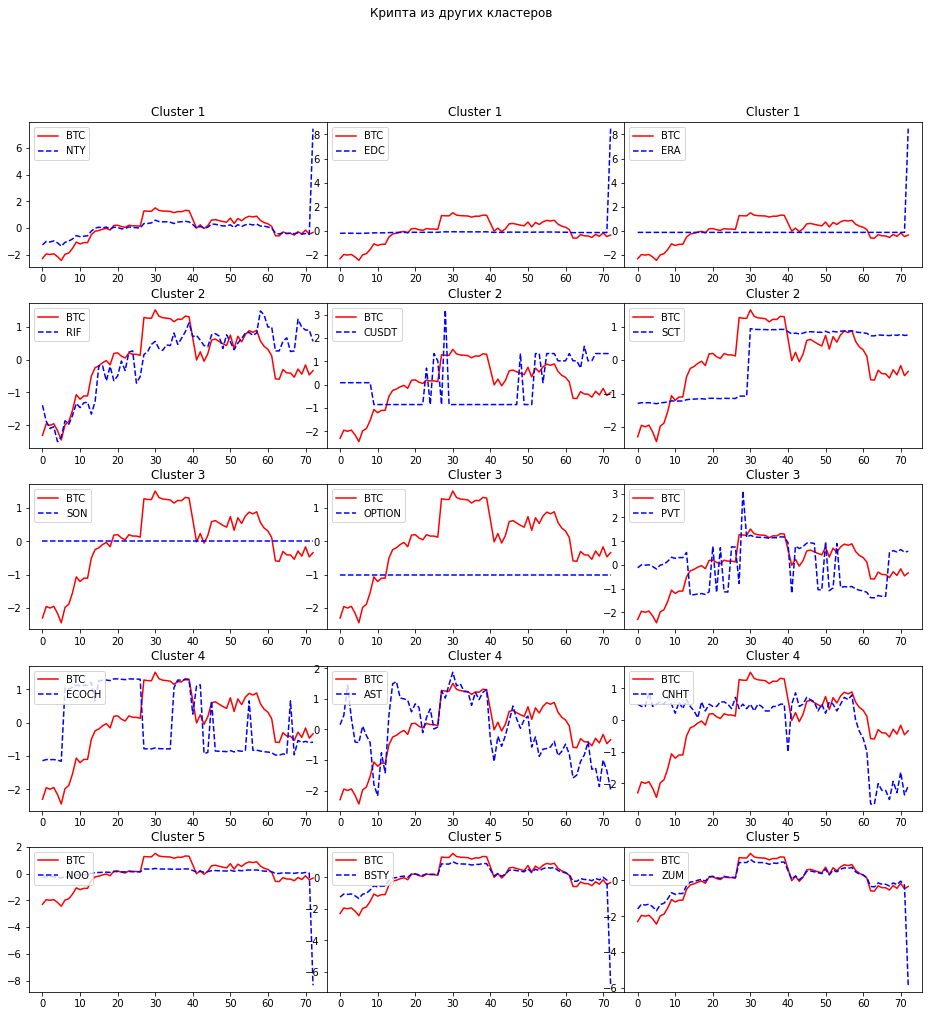

In [ ]:
mask = ~mask
plot_sample_coin(x_3, model_3.labels_, mask, 'Крипта из других кластеров', figsize=(16, 16))

За 1 час с минутной частотой

  0%|          | 0/19 [00:00<?, ?it/s]

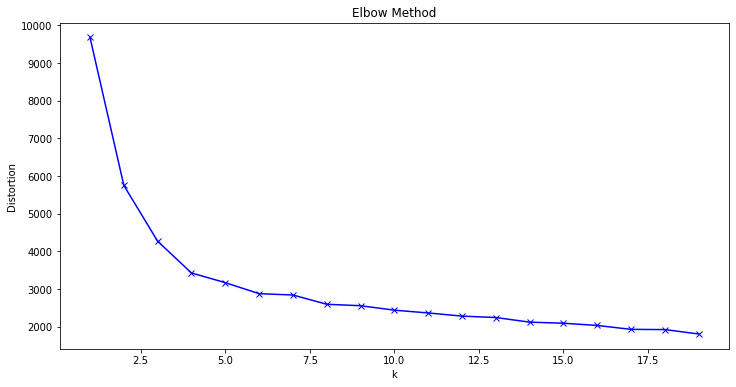

In [ ]:
plot_distortions(range(1,20), x_1, KMeans())

In [ ]:
model_1 = KMeans(n_clusters=6)
model_1.fit(x_1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

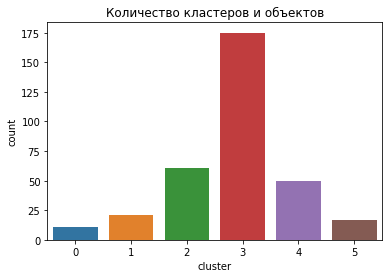

In [ ]:
cluster, count = np.unique(model_1.labels_, return_counts=True);
sns.barplot(x=cluster, y=count).set(xlabel='cluster', ylabel='count', title='Количество кластеров и объектов');

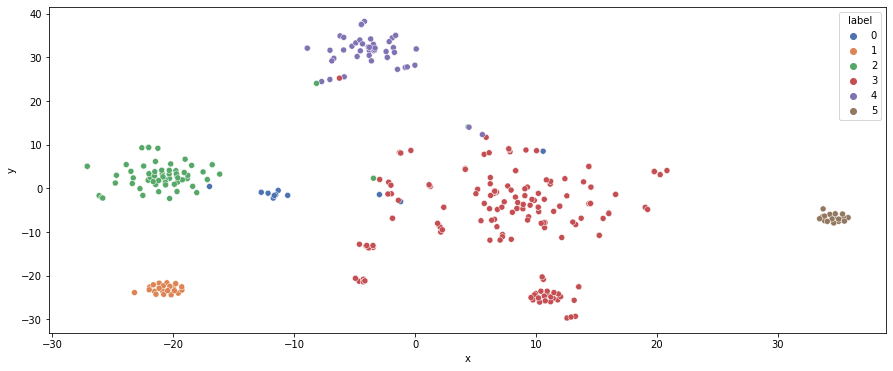

In [ ]:
tsne_1 = TSNE(perplexity=10, random_state=32).fit_transform(x_1)
tsne_df_1 = pd.DataFrame({'x':tsne_1[:,0], 'y':tsne_1[:,1], 'label':model_1.labels_})
fig, ax = plt.subplots(figsize=(15,6))
sns.scatterplot(data=tsne_df_1, x='x', y='y', palette="deep", hue='label');

Крипта похожая на биткойн

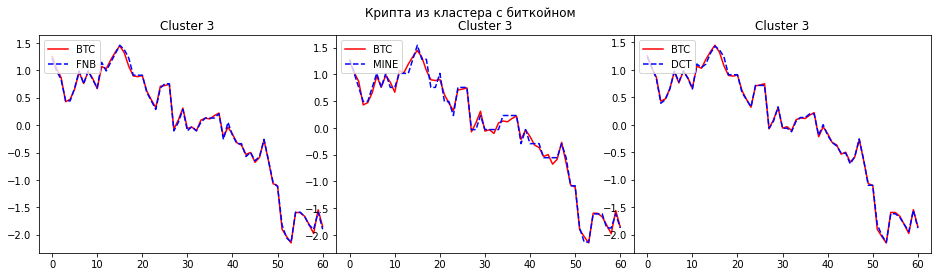

In [ ]:
mask = model_1.labels_ == model_1.labels_[index_of_btc]
plot_sample_coin(x_1, model_1.labels_, mask, 'Крипта из кластера с биткойном')

Примеры крипты попавших в другие кластера

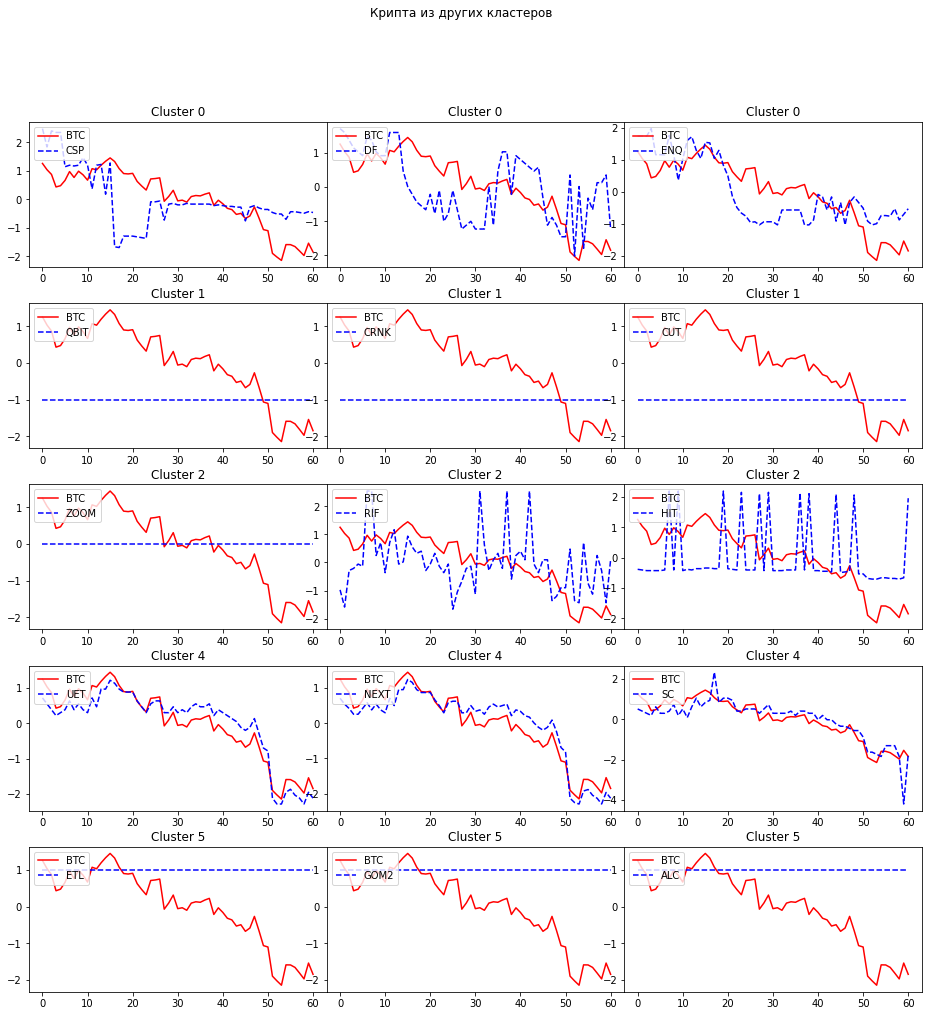

In [ ]:
mask = ~mask
plot_sample_coin(x_1, model_1.labels_, mask, 'Крипта из других кластеров', figsize=(16, 16))

# DTW Kmeans

30 дневный промежуток

  0%|          | 0/9 [00:00<?, ?it/s]

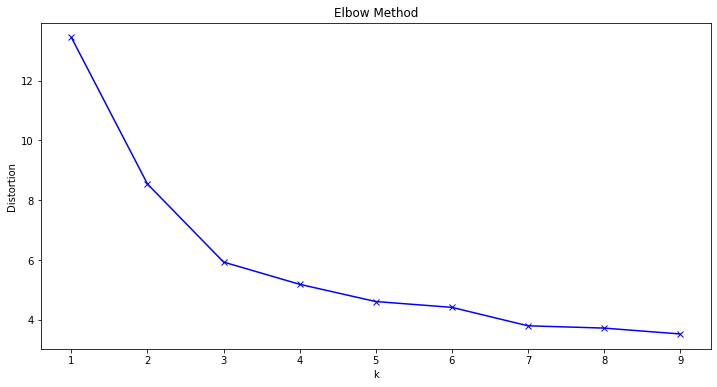

In [ ]:
plot_distortions(range(1,10), x_30, TimeSeriesKMeans(metric="dtw", n_jobs=4))

In [ ]:
model_30_dtw = TimeSeriesKMeans(n_clusters=4, metric="dtw", n_jobs=4)
model_30_dtw.fit(x_30)

TimeSeriesKMeans(dtw_inertia=False, init='k-means++', max_iter=50,
                 max_iter_barycenter=100, metric='dtw', metric_params=None,
                 n_clusters=4, n_init=1, n_jobs=4, random_state=None, tol=1e-06,
                 verbose=0)

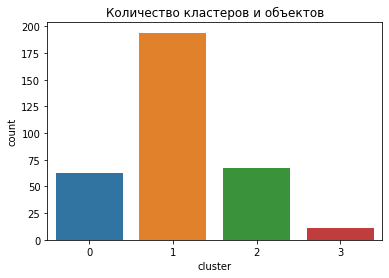

In [ ]:
cluster, count = np.unique(model_30_dtw .labels_, return_counts=True);
sns.barplot(x=cluster, y=count).set(xlabel='cluster', ylabel='count', title='Количество кластеров и объектов');

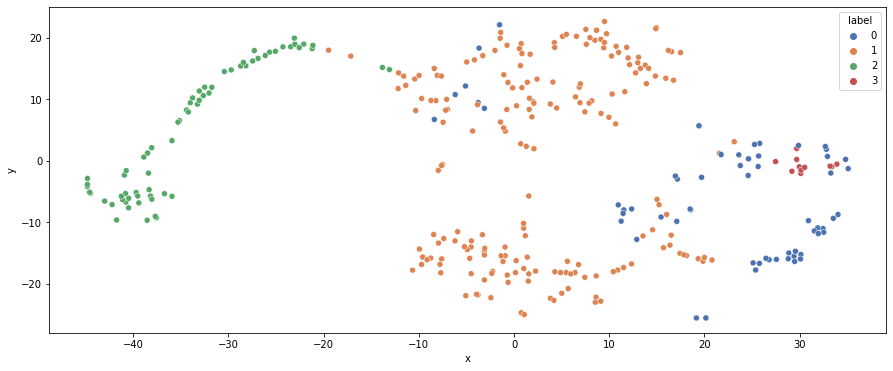

In [ ]:
tsne_30_dtw = tsne_30
tsne_df_30_dtw = pd.DataFrame({'x':tsne_30_dtw[:,0], 'y':tsne_30_dtw[:,1], 'label':model_30_dtw.labels_})
fig, ax = plt.subplots(figsize=(15,6))
sns.scatterplot(data=tsne_df_30_dtw, x='x', y='y', palette="deep", hue='label');

Крипта похожая на биткойн

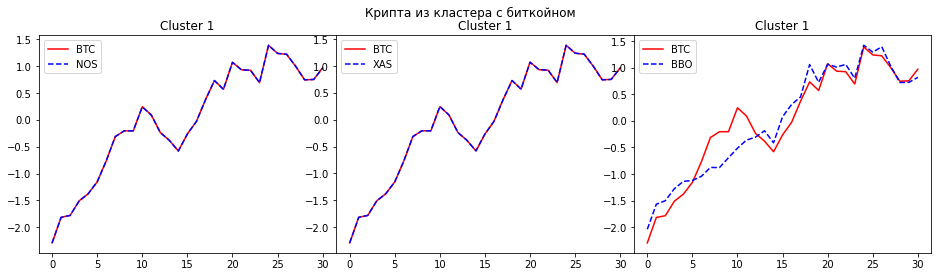

In [ ]:
mask = model_30_dtw.labels_ == model_30_dtw.labels_[index_of_btc]
plot_sample_coin(x_30, model_30_dtw.labels_, mask, 'Крипта из кластера с биткойном')

Примеры крипты попавших в другие кластера



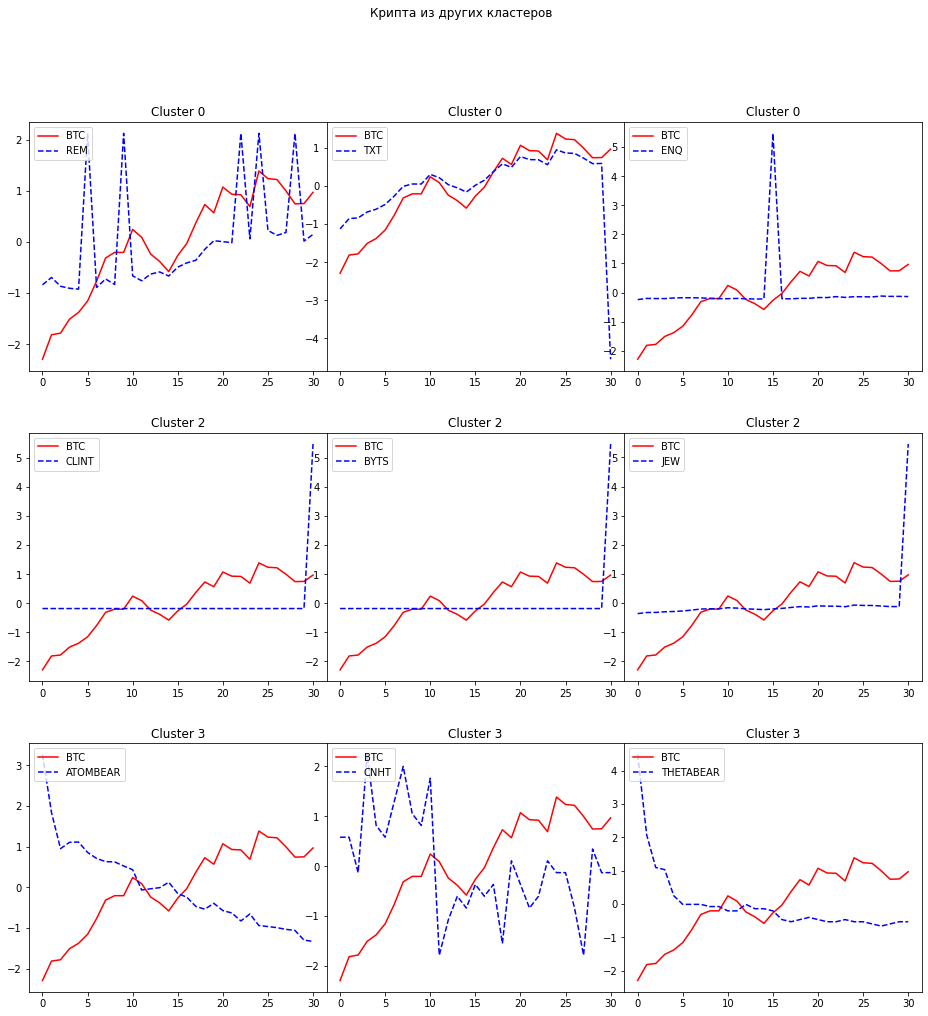

In [ ]:
mask = ~mask
plot_sample_coin(x_30, model_30_dtw.labels_, mask, 'Крипта из других кластеров', figsize=(16, 16))

За 3 дня с часовой частотой

  0%|          | 0/9 [00:00<?, ?it/s]

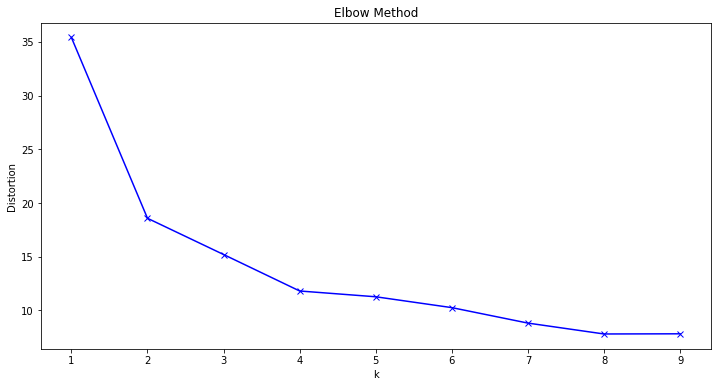

In [ ]:
plot_distortions(range(1,10), x_3, TimeSeriesKMeans(metric="dtw", n_jobs=4))

In [ ]:
model_3_dtw = TimeSeriesKMeans(n_clusters=4, metric="dtw", n_jobs=4)
model_3_dtw.fit(x_3)

TimeSeriesKMeans(dtw_inertia=False, init='k-means++', max_iter=50,
                 max_iter_barycenter=100, metric='dtw', metric_params=None,
                 n_clusters=4, n_init=1, n_jobs=4, random_state=None, tol=1e-06,
                 verbose=0)

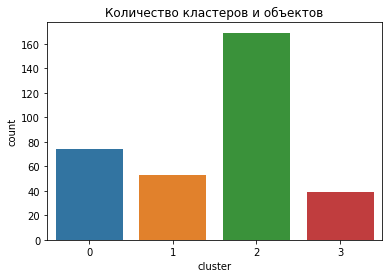

In [ ]:
cluster, count = np.unique(model_3_dtw .labels_, return_counts=True);
sns.barplot(x=cluster, y=count).set(xlabel='cluster', ylabel='count', title='Количество кластеров и объектов');

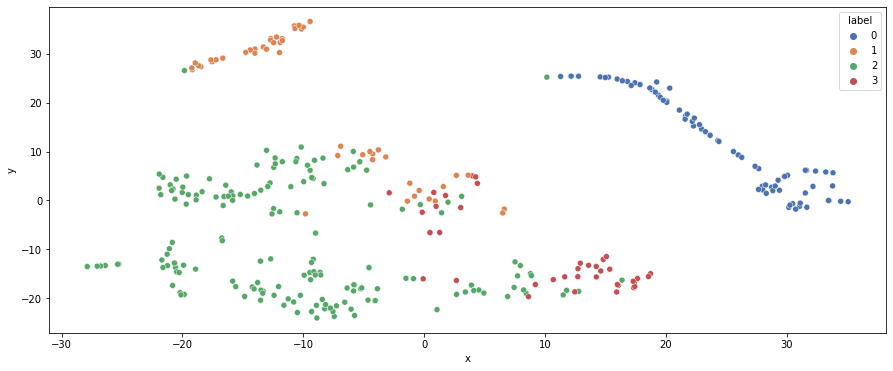

In [ ]:
tsne_3_dtw = tsne_3
tsne_df_3_dtw = pd.DataFrame({'x':tsne_3_dtw[:,0], 'y':tsne_3_dtw[:,1], 'label':model_3_dtw.labels_})
fig, ax = plt.subplots(figsize=(15,6))
sns.scatterplot(data=tsne_df_3_dtw, x='x', y='y', palette="deep", hue='label');

Крипта похожая на биткойн

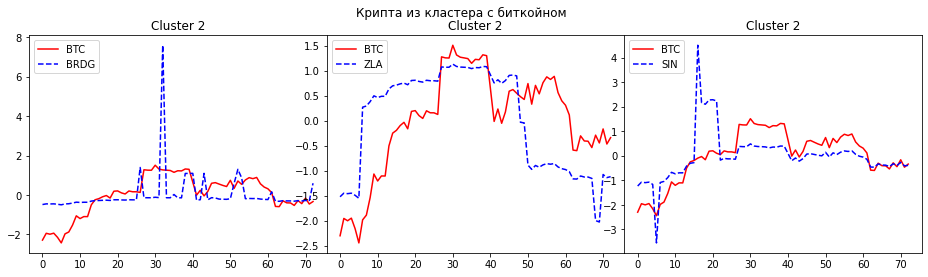

In [ ]:
mask = model_3_dtw.labels_ == model_3_dtw.labels_[index_of_btc]
plot_sample_coin(x_3, model_3_dtw.labels_, mask, 'Крипта из кластера с биткойном')

Примеры крипты попавших в другие кластера

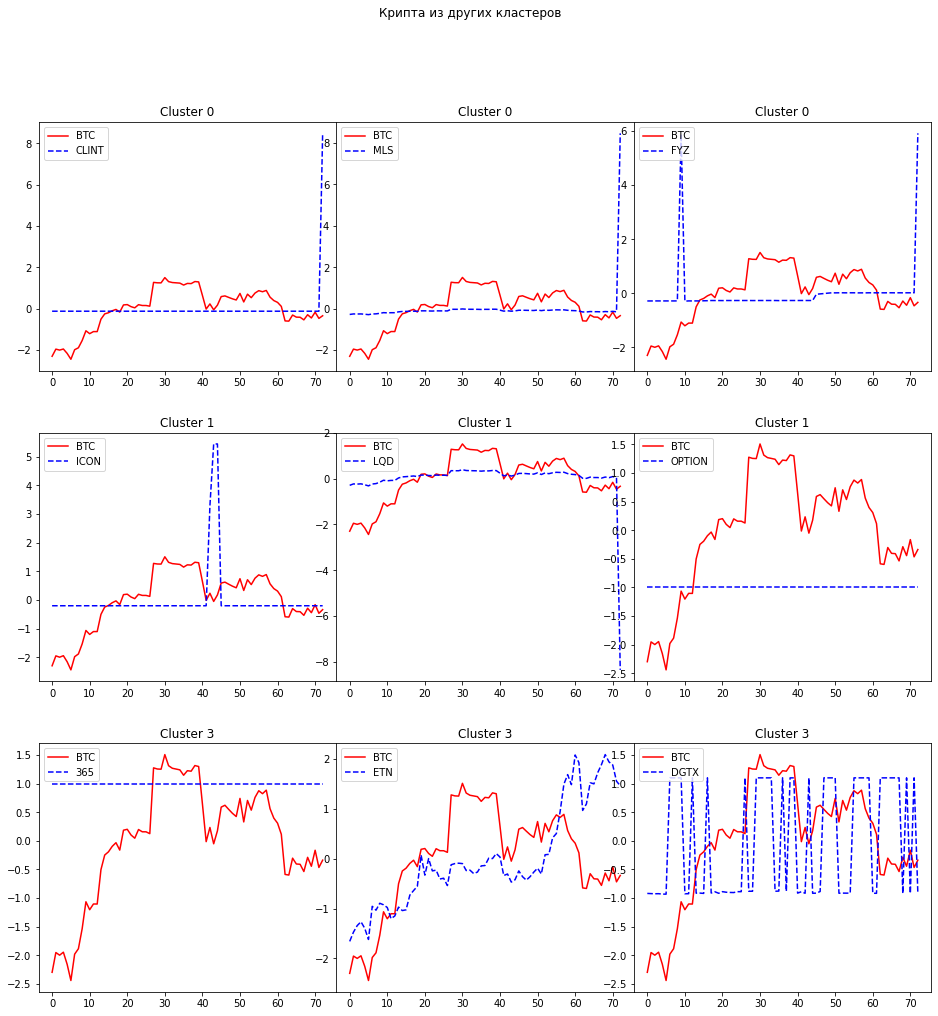

In [ ]:
mask = ~mask
plot_sample_coin(x_3, model_3_dtw.labels_, mask, 'Крипта из других кластеров', figsize=(16, 16))

За 1 час с минутной частотой

  0%|          | 0/9 [00:00<?, ?it/s]

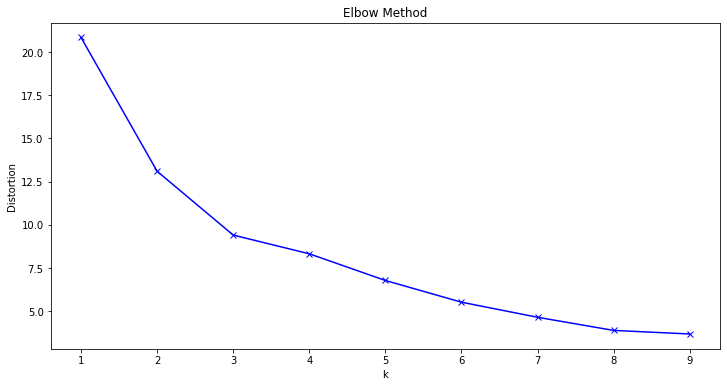

In [ ]:
plot_distortions(range(1,10), x_1, TimeSeriesKMeans(metric="dtw", n_jobs=4))

In [ ]:
model_1_dtw = TimeSeriesKMeans(n_clusters=4, metric="dtw", n_jobs=4)
model_1_dtw.fit(x_1)

TimeSeriesKMeans(dtw_inertia=False, init='k-means++', max_iter=50,
                 max_iter_barycenter=100, metric='dtw', metric_params=None,
                 n_clusters=4, n_init=1, n_jobs=4, random_state=None, tol=1e-06,
                 verbose=0)

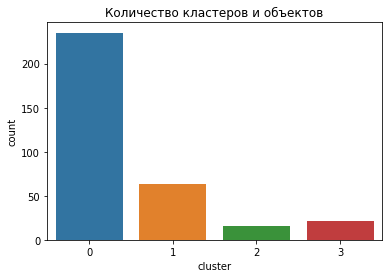

In [ ]:
cluster, count = np.unique(model_1_dtw .labels_, return_counts=True);
sns.barplot(x=cluster, y=count).set(xlabel='cluster', ylabel='count', title='Количество кластеров и объектов');

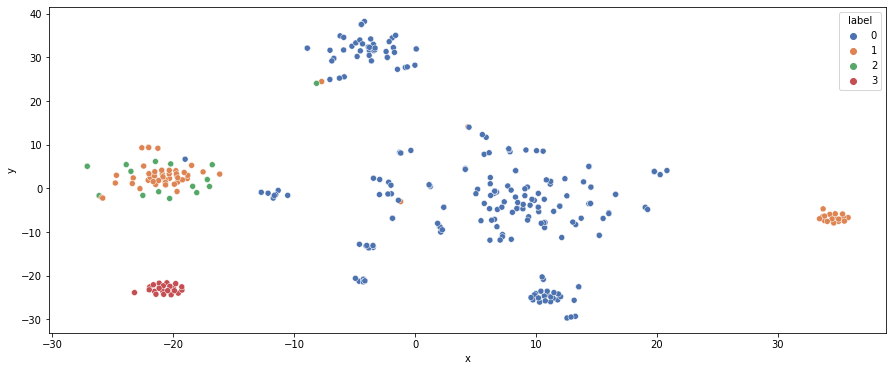

In [ ]:
tsne_1_dtw = tsne_1
tsne_df_1_dtw = pd.DataFrame({'x':tsne_1_dtw[:,0], 'y':tsne_1_dtw[:,1], 'label':model_1_dtw.labels_})
fig, ax = plt.subplots(figsize=(15,6))
sns.scatterplot(data=tsne_df_1_dtw, x='x', y='y', palette="deep", hue='label');

Крипта похожая на биткойн

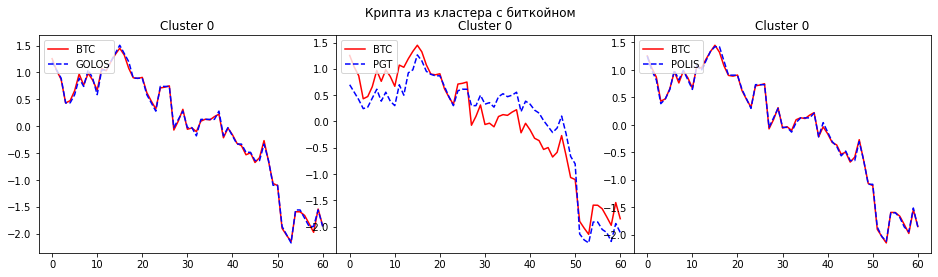

In [ ]:
mask = model_1_dtw.labels_ == model_1_dtw.labels_[index_of_btc]
plot_sample_coin(x_1, model_1_dtw.labels_, mask, 'Крипта из кластера с биткойном')

Примеры крипты попавших в другие кластера

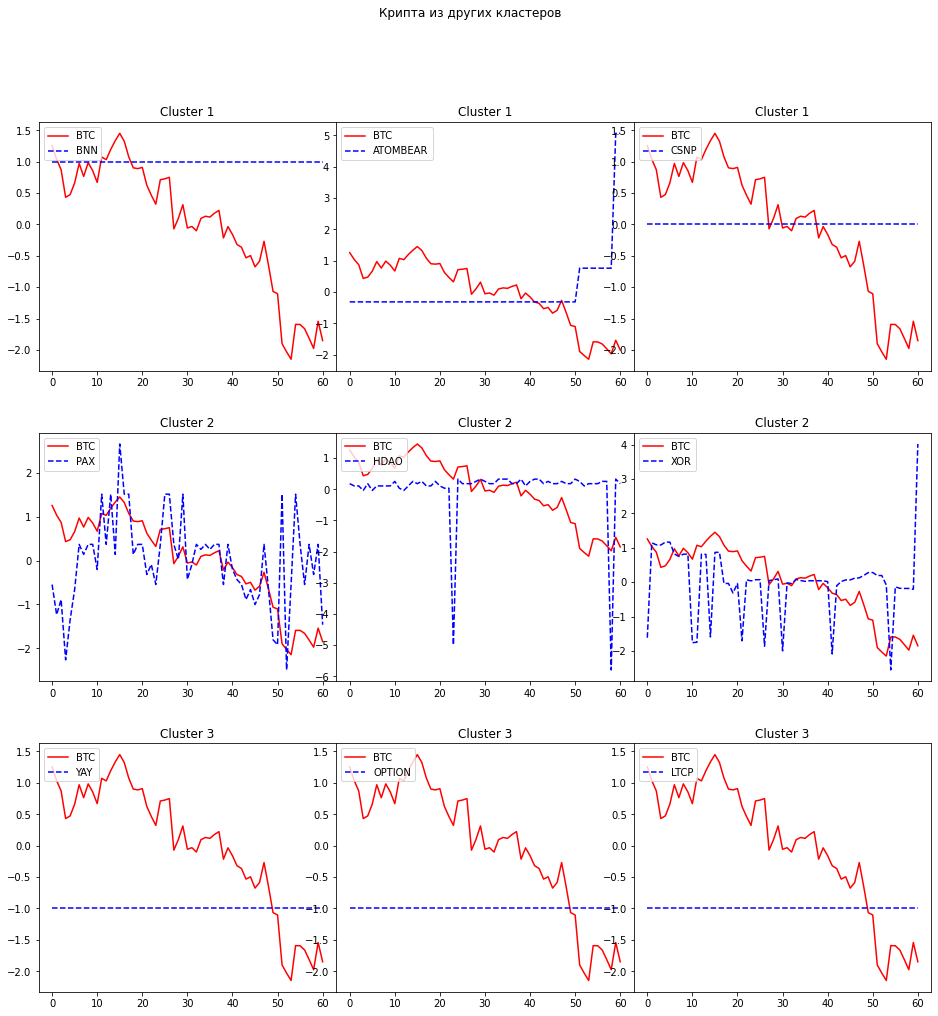

In [ ]:
mask = ~mask
plot_sample_coin(x_1, model_1_dtw.labels_, mask, 'Крипта из других кластеров', figsize=(16, 16))